#### Question to ask ourself
- How successful was the previous marketing campaign, what typr of clients did we attract most? 
- How different is our current customer base different from the new acquired customer base, which will help us indicate which category of consumers we can cater the need's to.
- Where do we see the bussiness going with new customers acquired. Do we need to make changes, if YES then to what extend.

In [ ]:
profits
cust_expense
merged_customer_demo
NewCustGender
OldCustomerDemographic

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import datetime
from ydata_quality import DataQuality 
from ydata_quality.bias_fairness import BiasFairness

#Visual libraries
import plotly.express as px
# from dash import Dash, dcc, html, Input, Output
# from plotly.offline import plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#Dashboard and Report libraries
import streamlit as st

In [2]:
#Main Calling
transcaction=pd.read_excel(r"C:\gitlab\KPMG_VI_New_raw_data_update_final.xlsx\KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="Transactions")
CustomerDemographic=pd.read_excel(r"C:\gitlab\KPMG_VI_New_raw_data_update_final.xlsx\KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerDemographic")
CustomerAddress=pd.read_excel(r"C:\gitlab\KPMG_VI_New_raw_data_update_final.xlsx\KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerAddress")
NewCustomerList=pd.read_excel(r"C:\gitlab\KPMG_VI_New_raw_data_update_final.xlsx\KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="NewCustomerList")

C:\Users\mohit\AppData\Local\Temp\ipykernel_3968\737387644.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  CustomerDemographic=pd.read_excel(r"C:\gitlab\KPMG_VI_New_raw_data_update_final.xlsx\KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerDemographic")


In [3]:
#reset the customer row names to proper values
def reset_df_header(df):
    df.columns=df.loc[0]
    df=df.drop(index=0,inplace=True)

In [4]:
reset_df_header(transcaction)
reset_df_header(CustomerAddress)
reset_df_header(NewCustomerList)

In [5]:
NewCustomerList = NewCustomerList.loc[:, NewCustomerList.columns.notna()]

In [16]:
NewCustomerList

0    first_name  last_name  gender past_3_years_bike_related_purchases  \
1       Chickie    Brister    Male                                  86   
2         Morly     Genery    Male                                  69   
3       Ardelis  Forrester  Female                                  10   
4        Lucine      Stutt  Female                                  64   
5       Melinda     Hadlee  Female                                  34   
...         ...        ...     ...                                 ...   
996   Ferdinand  Romanetti    Male                                  60   
997        Burk    Wortley    Male                                  22   
998    Melloney      Temby  Female                                  17   
999      Dickie    Cubbini    Male                                  30   
1000      Sylas    Duffill    Male                                  56   

0                     DOB                     job_title job_industry_category  \
1              1957-07-12               General Manager         Manufacturing   
2              1970-03-22           Structural Engineer              Property   
3     1974-08-28 00:00:00        Senior Cost Accountant    Financial Services   
4              1979-01-28    Account Representative III         Manufacturing   
5              1965-09-21             Financial Analyst    Financial Services   
...                   ...                           ...                   ...   
996            1959-10-07                     Paralegal    Financial Services   
997            2001-10-17        Senior Sales Associate                Health   
998            1954-10-05  Budget/Accounting Analyst IV    Financial Services   
999            1952-12-17             Financial Advisor    Financial Services   
1000           1955-10-02           Staff Accountant IV              Property   

0        wealth_segment deceased_indicator owns_car tenure  \
1         Mass Customer                  N      Yes     14   
2         Mass Customer                  N       No     16   
3     Affluent Customer                  N       No     10   
4     Affluent Customer                  N      Yes      5   
5     Affluent Customer                  N       No     19   
...                 ...                ...      ...    ...   
996   Affluent Customer                  N       No      9   
997       Mass Customer                  N       No      6   
998   Affluent Customer                  N      Yes     15   
999       Mass Customer                  N      Yes     19   
1000      Mass Customer                  N      Yes     14   

0                      address postcode state    country property_valuation  \
1             45 Shopko Center     4500   QLD  Australia                  6   
2            14 Mccormick Park     2113   NSW  Australia                 11   
3          5 Colorado Crossing     3505   VIC  Australia                  5   
4           207 Annamark Plaza     4814   QLD  Australia                  1   
5            115 Montana Place     2093   NSW  Australia                  9   
...                        ...      ...   ...        ...                ...   
996                2 Sloan Way     2200   NSW  Australia                  7   
997          04 Union Crossing     2196   NSW  Australia                 10   
998   33475 Fair Oaks Junction     4702   QLD  Australia                  2   
999         57666 Victoria Way     4215   QLD  Australia                  2   
1000        21875 Grover Drive     2010   NSW  Australia                  9   

0     Rank     Value  
1        1   1.71875  
2        1   1.71875  
3        1   1.71875  
4        4  1.703125  
5        4  1.703125  
...    ...       ...  
996    996     0.374  
997    997     0.357  
998    997     0.357  
999    997     0.357  
1000  1000      0.34  

[1000 rows x 18 columns]

#### EDA for New Customer List

- How successful was the previous marketing campaign, what typr of clients did we attract most? 
    - What is the new customer's demographic
    - Check for high value customers

In [6]:
#Finding gender demograph industry wise for new acquired customers
NewCustGender=NewCustomerList[['first_name','gender','job_industry_category']].groupby(['gender','job_industry_category']).count().reset_index()
NewCustGender.rename(columns={"first_name":"Count"},inplace=True)
NewCustGender['new_female_count']=NewCustGender['Count'][NewCustGender['gender']=='Female']
NewCustGender['new_male_count']=NewCustGender['Count'][NewCustGender['gender']=='Male']
NewCustGender['new_unknown_count']=NewCustGender['Count'][NewCustGender['gender']=='U']
NewCustGender.drop(columns=['gender','Count'],inplace=True)
NewCustGender=NewCustGender.groupby('job_industry_category').sum().reset_index()

#Finding gender demograph industry wise for new acquired customers
OldCustomerDemographic=CustomerDemographic[['name','gender','job_industry_category']].groupby(['gender','job_industry_category']).count().reset_index()
OldCustomerDemographic.rename(columns={"name":"Count"},inplace=True)
OldCustomerDemographic['old_female_count']=OldCustomerDemographic['Count'][OldCustomerDemographic['gender']=='Female']
OldCustomerDemographic['old_male_count']=OldCustomerDemographic['Count'][OldCustomerDemographic['gender']=='Male']
OldCustomerDemographic['old_unknown_count']=OldCustomerDemographic['Count'][OldCustomerDemographic['gender']=='U']
OldCustomerDemographic.drop(columns=['gender','Count'],inplace=True)
OldCustomerDemographic=OldCustomerDemographic.groupby('job_industry_category').sum().reset_index()
OldCustomerDemographic.rename(columns={"job_industry_category":"old_job_industry_category"},inplace=True)

#Merged File
merged_customer_demo=pd.concat([NewCustGender,OldCustomerDemographic],axis='columns') #,how='inner',on=['job_industry_category'])
merged_customer_demo.drop(columns=['old_job_industry_category'],inplace=True)
merged_customer_demo

job_industry_category  new_female_count  new_male_count  new_unknown_count  \
0           Argiculture              10.0            16.0                0.0   
1         Entertainment              20.0            16.0                1.0   
2    Financial Services             110.0            92.0                1.0   
3                Health              81.0            71.0                0.0   
4                    IT              18.0            18.0               15.0   
5         Manufacturing              97.0           102.0                0.0   
6              Property              35.0            29.0                0.0   
7                Retail              44.0            34.0                0.0   
8    Telecommunications              13.0            12.0                0.0   

   old_female_count  old_male_count  old_unknown_count  
0              57.0            56.0                0.0  
1              67.0            69.0                0.0  
2             392.0           375.0                7.0  
3             303.0           293.0                6.0  
4              79.0            72.0               72.0  
5             425.0           371.0                3.0  
6             144.0           123.0                0.0  
7             184.0           174.0                0.0  
8              39.0            33.0                0.0

In [7]:
def get_female_marketing_effectiveness(new,old):
    if new==0 and old==0:
        return 0
    else:
        sum=new+old
        return round(100*float(new/sum),2)
    

In [8]:
merged_customer_demo['f_effective%']=merged_customer_demo.apply(lambda x: get_female_marketing_effectiveness(x['new_female_count'],x['old_female_count']),axis=1)
merged_customer_demo['m_effective%']=merged_customer_demo.apply(lambda x: get_female_marketing_effectiveness(x['new_male_count'],x['old_male_count']),axis=1)
merged_customer_demo['u_effective%']=merged_customer_demo.apply(lambda x: get_female_marketing_effectiveness(x['new_unknown_count'],x['old_unknown_count']),axis=1)

In [9]:
merged_customer_demo

job_industry_category  new_female_count  new_male_count  new_unknown_count  \
0           Argiculture              10.0            16.0                0.0   
1         Entertainment              20.0            16.0                1.0   
2    Financial Services             110.0            92.0                1.0   
3                Health              81.0            71.0                0.0   
4                    IT              18.0            18.0               15.0   
5         Manufacturing              97.0           102.0                0.0   
6              Property              35.0            29.0                0.0   
7                Retail              44.0            34.0                0.0   
8    Telecommunications              13.0            12.0                0.0   

   old_female_count  old_male_count  old_unknown_count  f_effective%  \
0              57.0            56.0                0.0         14.93   
1              67.0            69.0                0.0         22.99   
2             392.0           375.0                7.0         21.91   
3             303.0           293.0                6.0         21.09   
4              79.0            72.0               72.0         18.56   
5             425.0           371.0                3.0         18.58   
6             144.0           123.0                0.0         19.55   
7             184.0           174.0                0.0         19.30   
8              39.0            33.0                0.0         25.00   

   m_effective%  u_effective%  
0         22.22          0.00  
1         18.82        100.00  
2         19.70         12.50  
3         19.51          0.00  
4         20.00         17.24  
5         21.56          0.00  
6         19.08          0.00  
7         16.35          0.00  
8         26.67          0.00

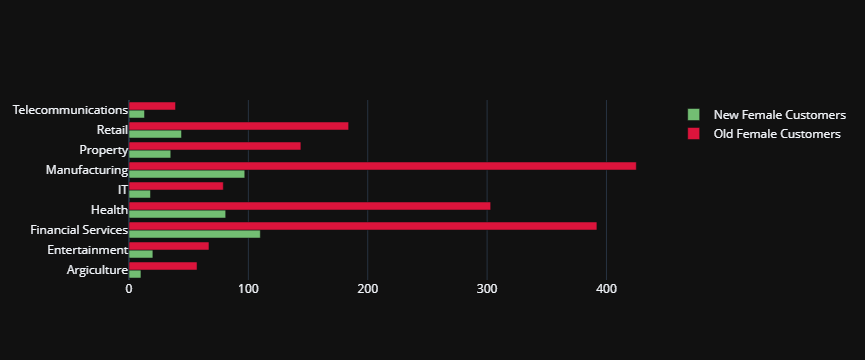

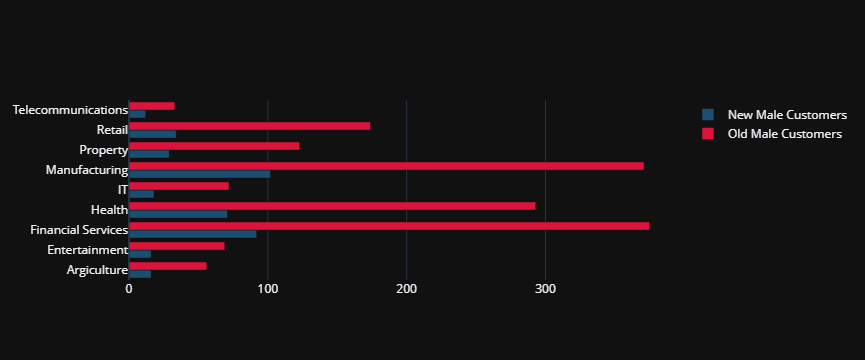

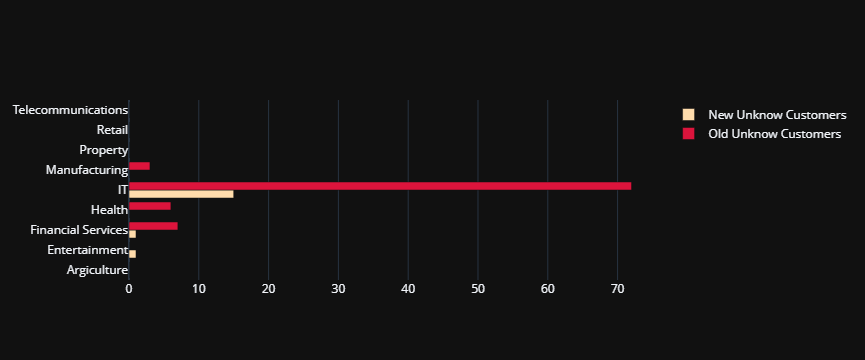

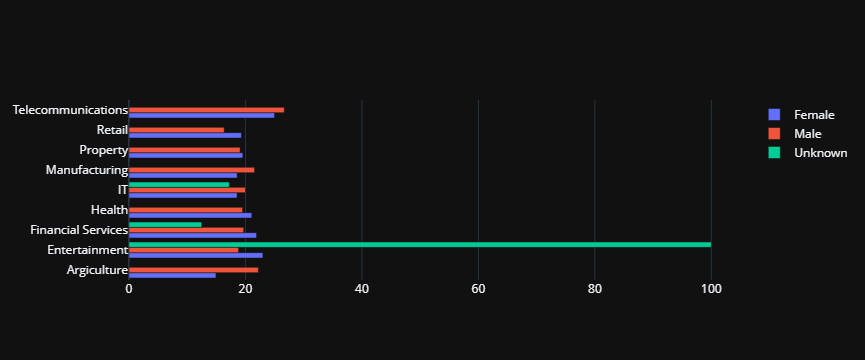

In [10]:
fig1 = go.Figure()
fig1.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo.new_female_count,orientation='h',marker_color='rgb(115,190,115)',name='New Female Customers'))
fig1.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo.old_female_count,orientation='h',marker_color='crimson',name='Old Female Customers'))
fig1.update_layout(template='plotly_dark')
fig1.show()

fig2=go.Figure()
fig2.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo.new_male_count,orientation='h',marker_color='rgb(27,79,114)',name='New Male Customers'))
fig2.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo.old_male_count,orientation='h',marker_color='crimson',name='Old Male Customers'))
fig2.update_layout(template='plotly_dark')
fig2.show()

fig3=go.Figure()
fig3.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo.new_unknown_count,orientation='h',marker_color='rgb(255, 220, 172)',name='New Unknow Customers'))
fig3.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo.old_unknown_count,orientation='h',marker_color='crimson',name='Old Unknow Customers'))
fig3.update_layout(template='plotly_dark')
fig3.show()

fig4=go.Figure()
fig4.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo['f_effective%'],orientation='h',name='Female'))
fig4.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo['m_effective%'],orientation='h',name='Male'))
fig4.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo['u_effective%'],orientation='h',name='Unknown'))
fig4.update_layout(template='plotly_dark')
fig4.show()

#### How different is our current customer base different from the new acquired customer base, which will help us indicate which category of consumers we can cater the need's to.

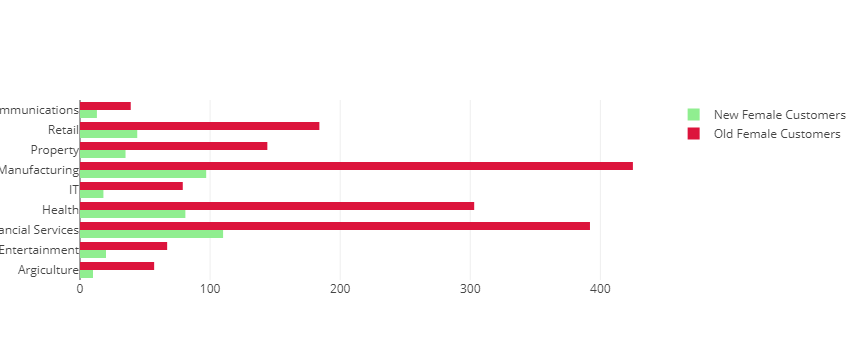

In [11]:
fig = go.Figure()
fig.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo.new_female_count,orientation='h',marker_color='rgb(144,238,144)',name='New Female Customers'))
fig.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo.old_female_count,orientation='h',marker_color='crimson',name='Old Female Customers'))

### Finding the spending cycle
-  Since the transactions are only for the year 2017 we will summarize the montly purchases for each month.
-  We will also find the most profitable month for the year 2017. 
-  Since the profits have a wide range we create two section, one for above average and the other for below average profit values
-  We need to find the most profitable and least profitable values per season

In [12]:
#finding the profits for each transaction
transcaction.transaction_date=pd.to_datetime(transcaction.transaction_date)
transcaction['month']=pd.DatetimeIndex(transcaction.transaction_date).month_name()
transcaction.list_price=transcaction.list_price.astype('float')
transcaction.standard_cost=transcaction.standard_cost.astype('float')
transcaction['profit(K)']=(transcaction.list_price-transcaction.standard_cost)/1000

#merging with customer demographic for further exploration
cust_expense=pd.merge(transcaction,CustomerDemographic,how='outer',on=['customer_id'])
cust_expense

#gouping by each month, customer type and product type
profits=cust_expense.groupby(['month','wealth_segment','product_size'])['profit(K)'].sum().reset_index()
profits=profits.round(2)

profits['above_avg']=profits['profit(K)'].apply(lambda x: x if x>profits['profit(K)'].mean() else 0)
profits['below_avg']=profits['profit(K)'].apply(lambda x: x if x<profits['profit(K)'].mean() else 0)
profits

C:\Users\mohit\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



month     wealth_segment product_size  profit(K)  above_avg  \
0        April  Affluent Customer        large      77.77       0.00   
1        April  Affluent Customer       medium     155.27     155.27   
2        April  Affluent Customer        small       7.37       0.00   
3        April     High Net Worth        large      70.20       0.00   
4        April     High Net Worth       medium     140.95     140.95   
..         ...                ...          ...        ...        ...   
103  September     High Net Worth       medium     144.34     144.34   
104  September     High Net Worth        small       8.52       0.00   
105  September      Mass Customer        large     156.69     156.69   
106  September      Mass Customer       medium     265.08     265.08   
107  September      Mass Customer        small      14.69       0.00   

     below_avg  
0        77.77  
1         0.00  
2         7.37  
3        70.20  
4         0.00  
..         ...  
103       0.00  
104       8.52  
105       0.00  
106       0.00  
107      14.69  

[108 rows x 6 columns]

# DQ

In [ ]:
dq = DataQuality(df=profits)
results = dq.evaluate()

In [ ]:
dq.get_warnings(test="High Collinearity - Numerical")

In [ ]:
dq = BiasFairness(df=profits,sensitive_features=['wealth_segment', 'month'], label='profit(K)') # create the main class that holds all quality modules
results = dq.evaluate()
print(results)

print(dq.get_warnings(test='Proxy Identification'))

print('\n Lowering the threshold \n')

dq.proxy_identification(th=0.45)

print('\n Sensitive Attribute Predictability \n')
dq.get_warnings(test='Sensitive Attribute Predictability')

In [ ]:
dq = BiasFairness(df=profits,sensitive_features=['wealth_segment', 'product_size'], label='profit(K)') # create the main class that holds all quality modules
results = dq.evaluate()

print(dq.get_warnings(test='Proxy Identification'))

print('\n Lowering the threshold \n')

dq.proxy_identification(th=0.45)

print('\n Sensitive Attribute Predictability \n')
dq.get_warnings(test='Sensitive Attribute Predictability')

In [ ]:
dq.get_warnings(test='Proxy Identification')

In [ ]:
dq = BiasFairness(df=profits,sensitive_features=['product_size', 'month'], label='profit(K)') # create the main class that holds all quality modules
results = dq.evaluate()

print(dq.get_warnings(test='Proxy Identification'))

print('\n Lowering the threshold \n')

dq.proxy_identification(th=0.45)

print('\n Sensitive Attribute Predictability \n')
dq.get_warnings(test='Sensitive Attribute Predictability')

In [15]:
monthly_profit=profits.groupby(['month','wealth_segment','product_size'])['above_avg'].sum().reset_index()
sorteded=monthly_profit.sort_values(by=['above_avg'],ascending=False)
sorteded

month product_size  profit(K)
31    October       medium     623.34
16       July       medium     610.99
4      August       medium     605.41
1       April       medium     587.87
28   November       medium     578.98
13    January       medium     578.21
10   February       medium     562.15
22      March       medium     559.11
7    December       medium     554.32
19       June       medium     543.14
34  September       medium     542.21
25        May       medium     535.04
24        May        large     342.58
3      August        large     329.43
30    October        large     326.95
12    January        large     318.12
27   November        large     314.88
6    December        large     303.19
15       July        large     293.31
33  September        large     288.34
21      March        large     285.86
0       April        large     284.34
18       June        large     284.31
9    February        large     274.82
26        May        small      36.12
5      August        small      35.61
32    October        small      34.58
17       July        small      34.32
23      March        small      34.27
8    December        small      33.93
11   February        small      33.85
14    January        small      32.98
2       April        small      32.47
20       June        small      32.12
35  September        small      31.74
29   November        small      31.07

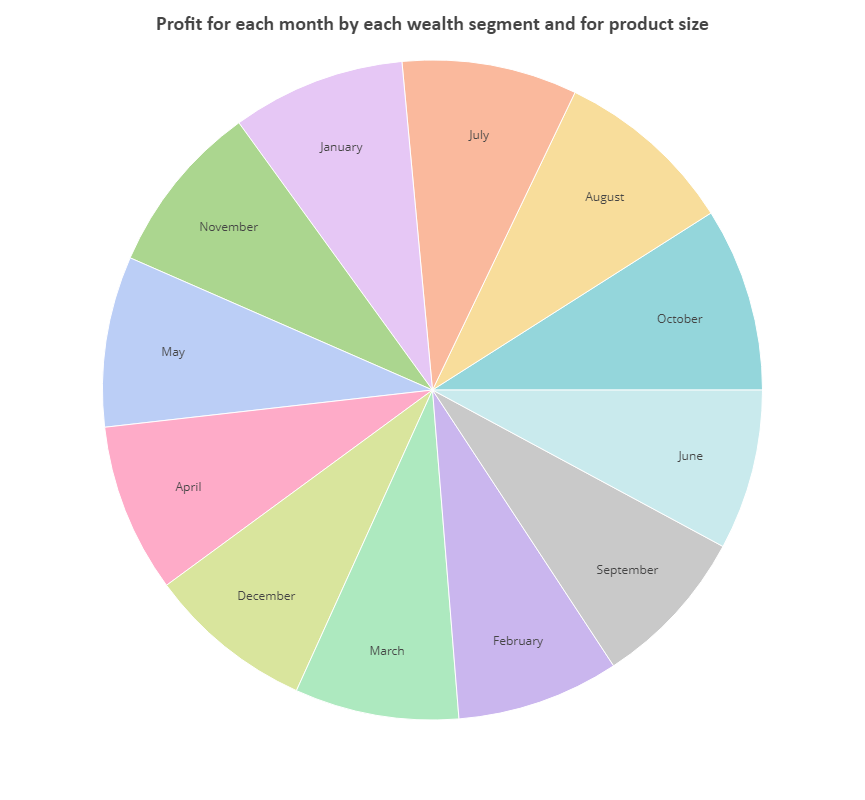

In [17]:
fig = px.sunburst(profits,
                  path=['month'],values='profit(K)',color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text="<b>Profit for each month by each wealth segment and for product size<b>", 
                  titlefont={'size': 20, 'family':'calibri'},
                  width=800, 
                  height=800,
                  
                 )
fig.show()

In [79]:
cust_expense

transaction_id product_id customer_id transaction_date online_order  \
0                  1          2      2950.0       2017-02-25        False   
1              11065          1      2950.0       2017-10-16        False   
2              18923         62      2950.0       2017-04-26        False   
3                  2          3      3120.0       2017-05-21         True   
4               6862          4      3120.0       2017-10-05        False   
...              ...        ...         ...              ...          ...   
20502            NaN        NaN      3607.0              NaT          NaN   
20503            NaN        NaN      3616.0              NaT          NaN   
20504            NaN        NaN      3749.0              NaT          NaN   
20505            NaN        NaN      3949.0              NaT          NaN   
20506            NaN        NaN      3997.0              NaT          NaN   

      order_status           brand product_line product_class product_size  \
0         Approved           Solex     Standard        medium       medium   
1         Approved  Giant Bicycles     Standard        medium       medium   
2         Approved           Solex     Standard        medium       medium   
3         Approved   Trek Bicycles     Standard        medium        large   
4         Approved  Giant Bicycles     Standard          high       medium   
...            ...             ...          ...           ...          ...   
20502          NaN             NaN          NaN           NaN          NaN   
20503          NaN             NaN          NaN           NaN          NaN   
20504          NaN             NaN          NaN           NaN          NaN   
20505          NaN             NaN          NaN           NaN          NaN   
20506          NaN             NaN          NaN           NaN          NaN   

       ...  gender  past_3_years_bike_related_purchases        DOB   age  \
0      ...    Male                                 19.0 1955-01-11  65.0   
1      ...    Male                                 19.0 1955-01-11  65.0   
2      ...    Male                                 19.0 1955-01-11  65.0   
3      ...  Female                                 89.0 1979-02-04  41.0   
4      ...  Female                                 89.0 1979-02-04  41.0   
...    ...     ...                                  ...        ...   ...   
20502  ...    Male                                 99.0 2001-05-22  19.0   
20503  ...    Male                                 42.0 2001-04-02  19.0   
20504  ...  Female                                  3.0 2001-04-21  19.0   
20505  ...    Male                                 24.0 2001-12-19  18.0   
20506  ...  Female                                 87.0 2001-07-13  18.0   

                 job_title job_industry_category     wealth_segment  \
0      Software Engineer I    Financial Services      Mass Customer   
1      Software Engineer I    Financial Services      Mass Customer   
2      Software Engineer I    Financial Services      Mass Customer   
3      Clinical Specialist                Health      Mass Customer   
4      Clinical Specialist                Health      Mass Customer   
...                    ...                   ...                ...   
20502  Clinical Specialist                Health      Mass Customer   
20503     Product Engineer              Property     High Net Worth   
20504                  NaN                    IT  Affluent Customer   
20505      Web Designer IV         Manufacturing     High Net Worth   
20506      Statistician II         Manufacturing     High Net Worth   

       deceased_indicator owns_car  tenure  
0                       N      Yes    10.0  
1                       N      Yes    10.0  
2                       N      Yes    10.0  
3                       N      Yes    10.0  
4                       N      Yes    10.0  
...                   ...      ...     ...  
20502                   N       No     1.0  
20503             

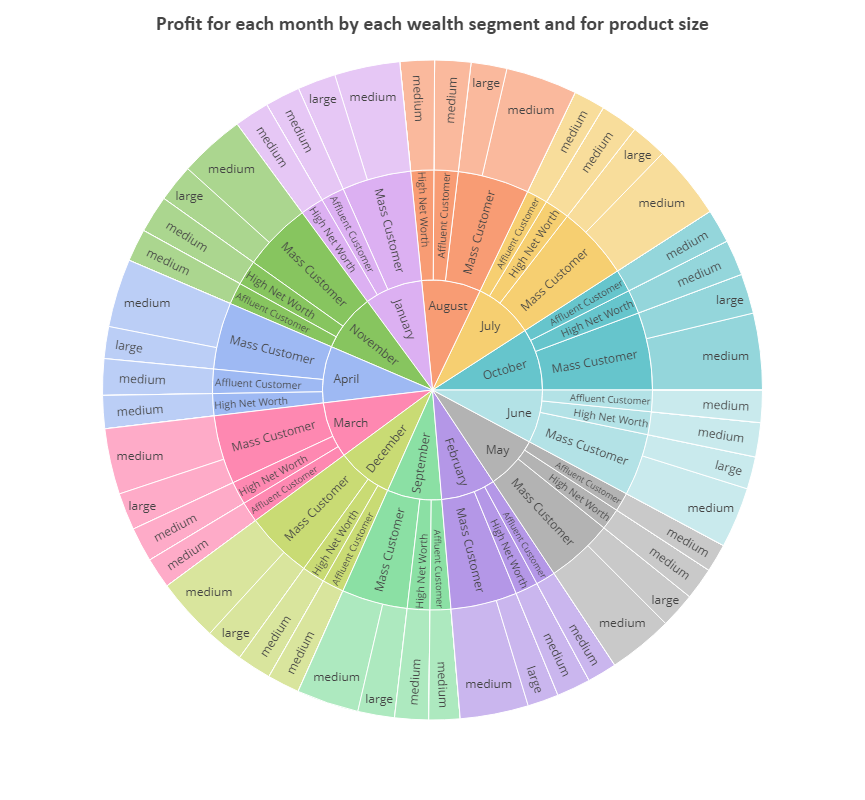

In [69]:
fig = px.sunburst(profits,
                  path=['month', 'wealth_segment', 'product_size'],values='above_avg',color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text="<b>Profit for each month by each wealth segment and for product size<b>", 
                  titlefont={'size': 20, 'family':'calibri'},
                  width=800, 
                  height=800,
                  
                 )
fig.show()

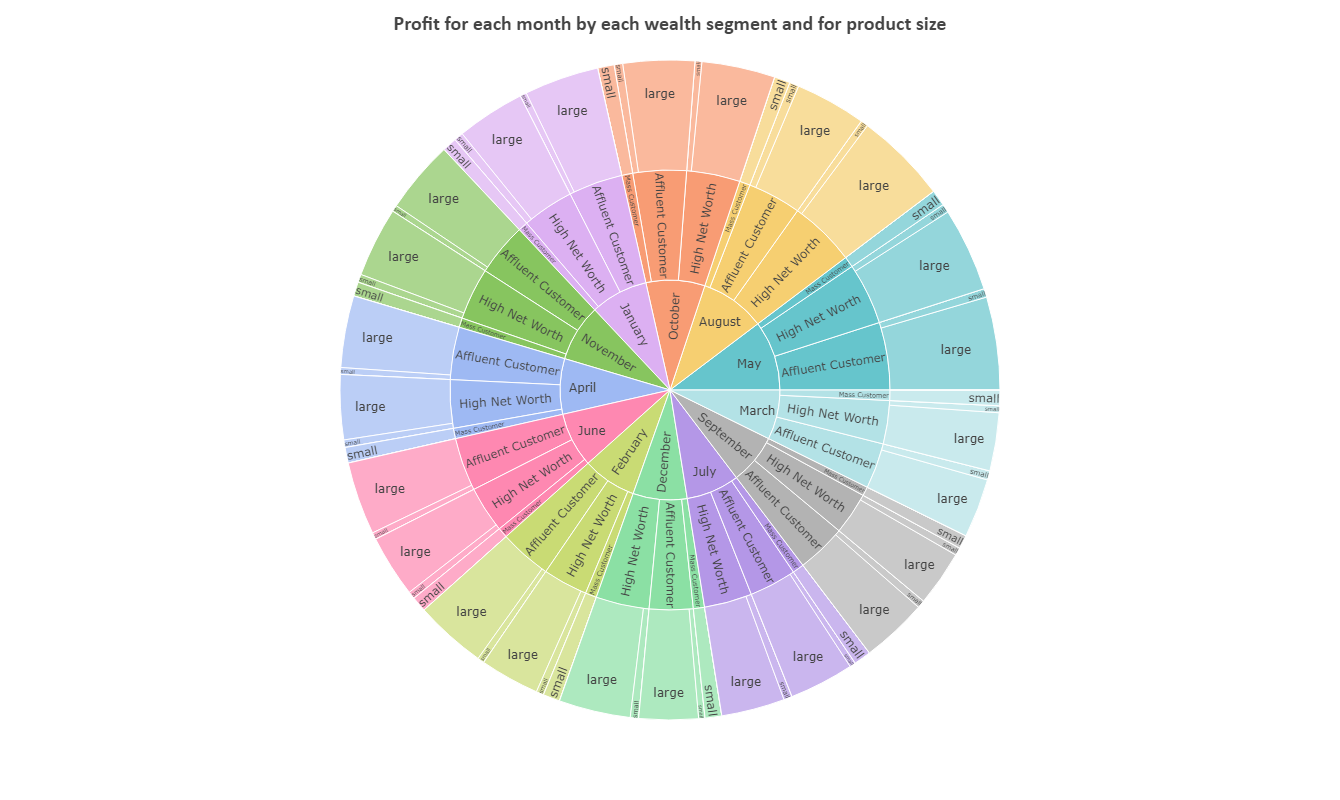

In [70]:
fig = px.sunburst(profits,
                  path=['month', 'wealth_segment', 'product_size'],values='below_avg',color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text="<b>Profit for each month by each wealth segment and for product size<b>", 
                  titlefont={'size': 20, 'family':'calibri'},
                  width=800, 
                  height=800,
                 )
fig.show()

In [71]:
# from pandas.tseries.holiday import USFederalHolidayCalendar as uscalendar
# transcaction['week']=transcaction.transaction_date.dt.isocalendar().week
# transcaction

# def us_holiday_week_range(df: pd.DataFrame, max_day_delay=5) -> pd.DataFrame:
#     """Generates a list of Federal US holidays, duplicated forward `max_day_delay` times.
#     A holiday happening on a Monday will be duplicated until that week's Friday if the delay is set to 5.
#     """
#     cal = uscalendar()
#     holidays = pd.Series(cal.holidays(start=df['transaction_date'].min(), end=df['transaction_date'].max()))
#     holiday_range = pd.concat(
#         [holidays, *[holidays + pd.Timedelta(i, 'd') for i in range(1, max_day_delay + 1)]]
#     )
#     df['us_holiday_week'] = df['transaction_date'].isin(holiday_range)
#     return df

# us_holiday_week_range(transcaction)

In [72]:
transcaction

0     transaction_id product_id customer_id transaction_date online_order  \
1                  1          2        2950       2017-02-25        False   
2                  2          3        3120       2017-05-21         True   
3                  3         37         402       2017-10-16        False   
4                  4         88        3135       2017-08-31        False   
5                  5         78         787       2017-10-01         True   
...              ...        ...         ...              ...          ...   
19996          19996         51        1018       2017-06-24         True   
19997          19997         41         127       2017-11-09         True   
19998          19998         87        2284       2017-04-14         True   
19999          19999          6        2764       2017-07-03        False   
20000          20000         11        1144       2017-09-22         True   

0     order_status           brand product_line product_class product_size  \
1         Approved           Solex     Standard        medium       medium   
2         Approved   Trek Bicycles     Standard        medium        large   
3         Approved      OHM Cycles     Standard           low       medium   
4         Approved  Norco Bicycles     Standard        medium       medium   
5         Approved  Giant Bicycles     Standard        medium        large   
...            ...             ...          ...           ...          ...   
19996     Approved      OHM Cycles     Standard          high       medium   
19997     Approved           Solex         Road        medium       medium   
19998     Approved      OHM Cycles     Standard        medium       medium   
19999     Approved      OHM Cycles     Standard          high       medium   
20000     Approved   Trek Bicycles     Standard        medium        small   

0      list_price  standard_cost product_first_sold_date      month  profit(K)  
1           71.49          53.62                   41245   February    0.01787  
2         2091.47         388.92                   41701        May    1.70255  
3         1793.43         248.82                   36361    October    1.54461  
4         1198.46         381.10                   36145     August    0.81736  
5         1765.30         709.48                   42226    October    1.05582  
...           ...            ...                     ...        ...        ...  
19996     2005.66        1203.40                   37823       June    0.80226  
19997      416.98         312.74                   35560   November    0.10424  
19998     1636.90          44.71                   40410      April    1.59219  
19999      227.88         136.73                   38216       July    0.09115  
20000     1775.81        1580.47                   36334  September    0.19534  

[20000 rows x 15 columns]

online_order
False    5387.899645
True     5340.916690
Name: profit(K), dtype: float64

online_order  product_class
False         high              531.837080
              low               560.889210
              medium           4295.173355
True          high              559.843670
              low               617.601280
              medium           4163.471740
Name: profit(K), dtype: float64

online_order  product_class  product_line
False         high           Road              29.544540
                             Standard         502.292540
              low            Mountain          19.237770
                             Road             100.687540
                             Standard         425.509370
                             Touring           15.454530
              medium         Road             549.462345
                             Standard        3110.776600
                             Touring          634.934410
True          high           Road              29.626140
                             Standard         530.217530
              low            Mountain          21.123690
                             Road             110.634150
                             Standard         469.831990
                             Touring           16.011450
              medium         Road             554.763750
                             Standard        2